# QRGS | Analiza danych

Importowanie niezbędnych paczek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats import inter_rater

from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict

Wrzuć plik z danymi w ```.csv``` do tego samego folderu, co notatnik Jupytera.

In [2]:
# zmień to, co jest w nawiasie na nazwę Twojego pliku .csv

qrgs_data = pd.read_csv("dane08_04-z-spss.csv")

## Grupa badanych – Proste analizy statystyczne 

### Wiek

In [3]:
#analiza
liczba_badanych = qrgs_data["user"].count()
minimum_age = np.amin(qrgs_data["wiek"])
maximum_age = np.amax(qrgs_data["wiek"])
mean_age = round(np.mean(qrgs_data["wiek"]), 2)
median_age = np.median(qrgs_data["wiek"])
std_age = round(np.std(qrgs_data["wiek"]), 2)


# wyniki analizy
print("Liczba przebadanych osób: " + str(liczba_badanych))
print("Minimalny wiek: " + str(minimum_age))
print("Maksymalny wiek: " + str(maximum_age))

print("Średnia wieku: " + str(mean_age))
print("Mediana wieku: " + str(median_age))
print("Odchylenie standardowe: " + str(std_age))

Liczba przebadanych osób: 32
Minimalny wiek: 20
Maksymalny wiek: 70
Średnia wieku: 28.03
Mediana wieku: 23.0
Odchylenie standardowe: 11.09


### Płeć

Osoby biorące udział w badaniu:
           liczba  procent
kobieta        26     81.2
mężczyzna       5     15.6
inna            1      3.1


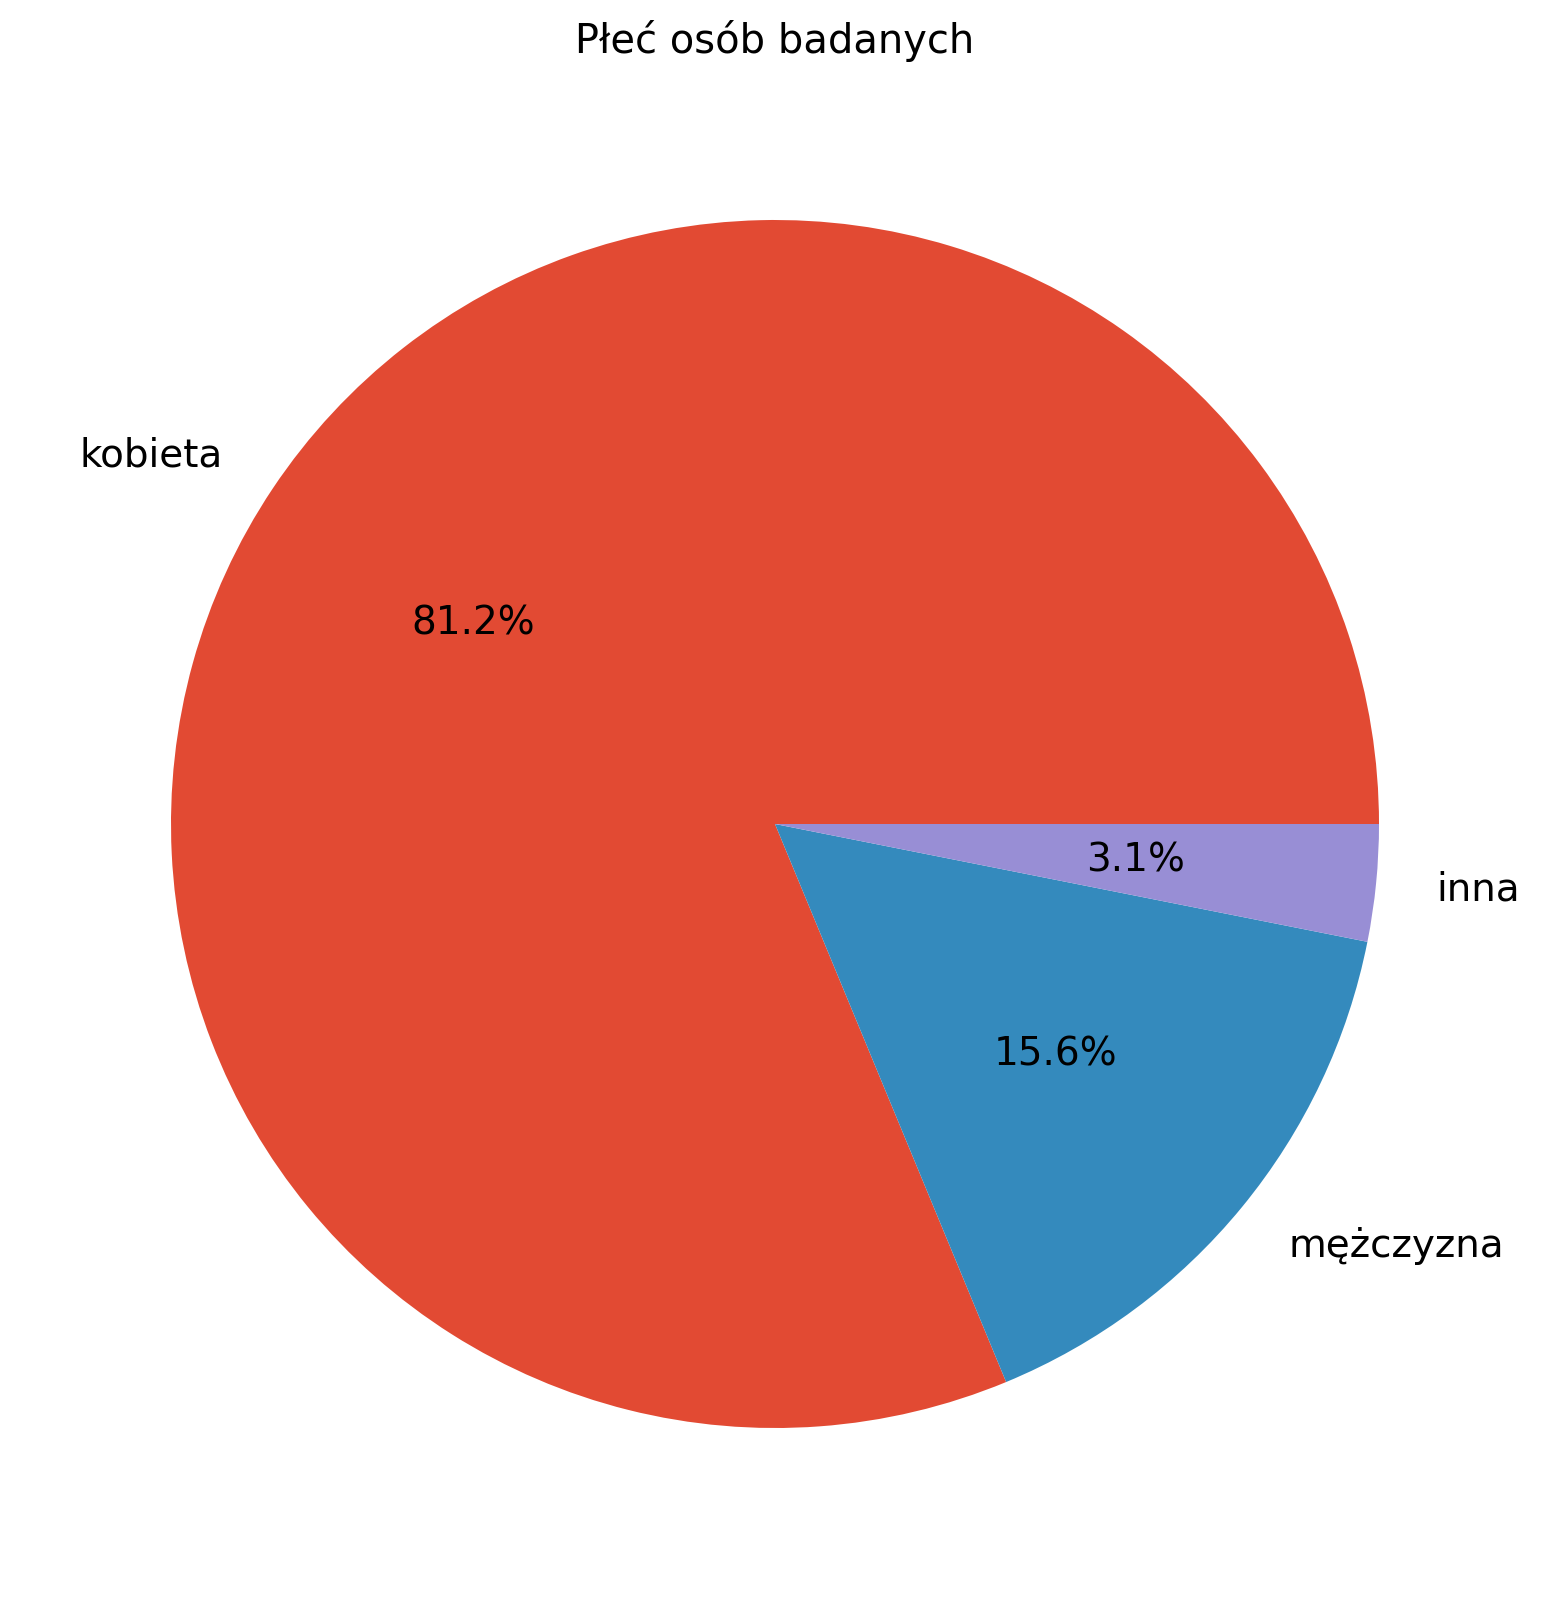

\begin{tabular}{lrr}
\toprule
{} &  liczba &  procent \\
\midrule
kobieta   &      26 &     81.2 \\
mężczyzna &       5 &     15.6 \\
inna      &       1 &      3.1 \\
\bottomrule
\end{tabular}



In [46]:
# zapisujemy kolumnę "płeć" w nowej zmiennej i rekodujemy wartości na płcie
rozklad_plci = qrgs_data["plec"].replace({1: "kobieta", 2: "mężczyzna", 0: "inna"})

# liczymy wystąpienia i rozkład procentowy
osoby_badane_plcie = rozklad_plci.value_counts()
osoby_badane_procent = round(rozklad_plci.value_counts(normalize=True) * 100, 1)

# tworzymy jedną ładną tabelkę
wyniki_plec = pd.concat([osoby_badane_plcie, osoby_badane_procent], axis=1)
wyniki_plec.columns = ["liczba", "procent"]
output = wyniki_plec.to_latex()


# rysujemy wykres
plt.pie(osoby_badane_plcie[:], labels=["kobieta", "mężczyzna", "inna"], autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title("Płeć osób badanych")
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['figure.dpi'] = 200
plt.style.use('ggplot')


# pokazujemy wyniki naszej pracy
print("Osoby biorące udział w badaniu:")
print(wyniki_plec)

plt.show()

print(output)

### Wykształcenie

Wykształcenie osób badanych:
                           liczba  procent
Średnie                        15     46.9
Studia drugiego stopnia         9     28.1
Studia pierwszego stopnia       7     21.9
Studia trzeciego stopnia        1      3.1


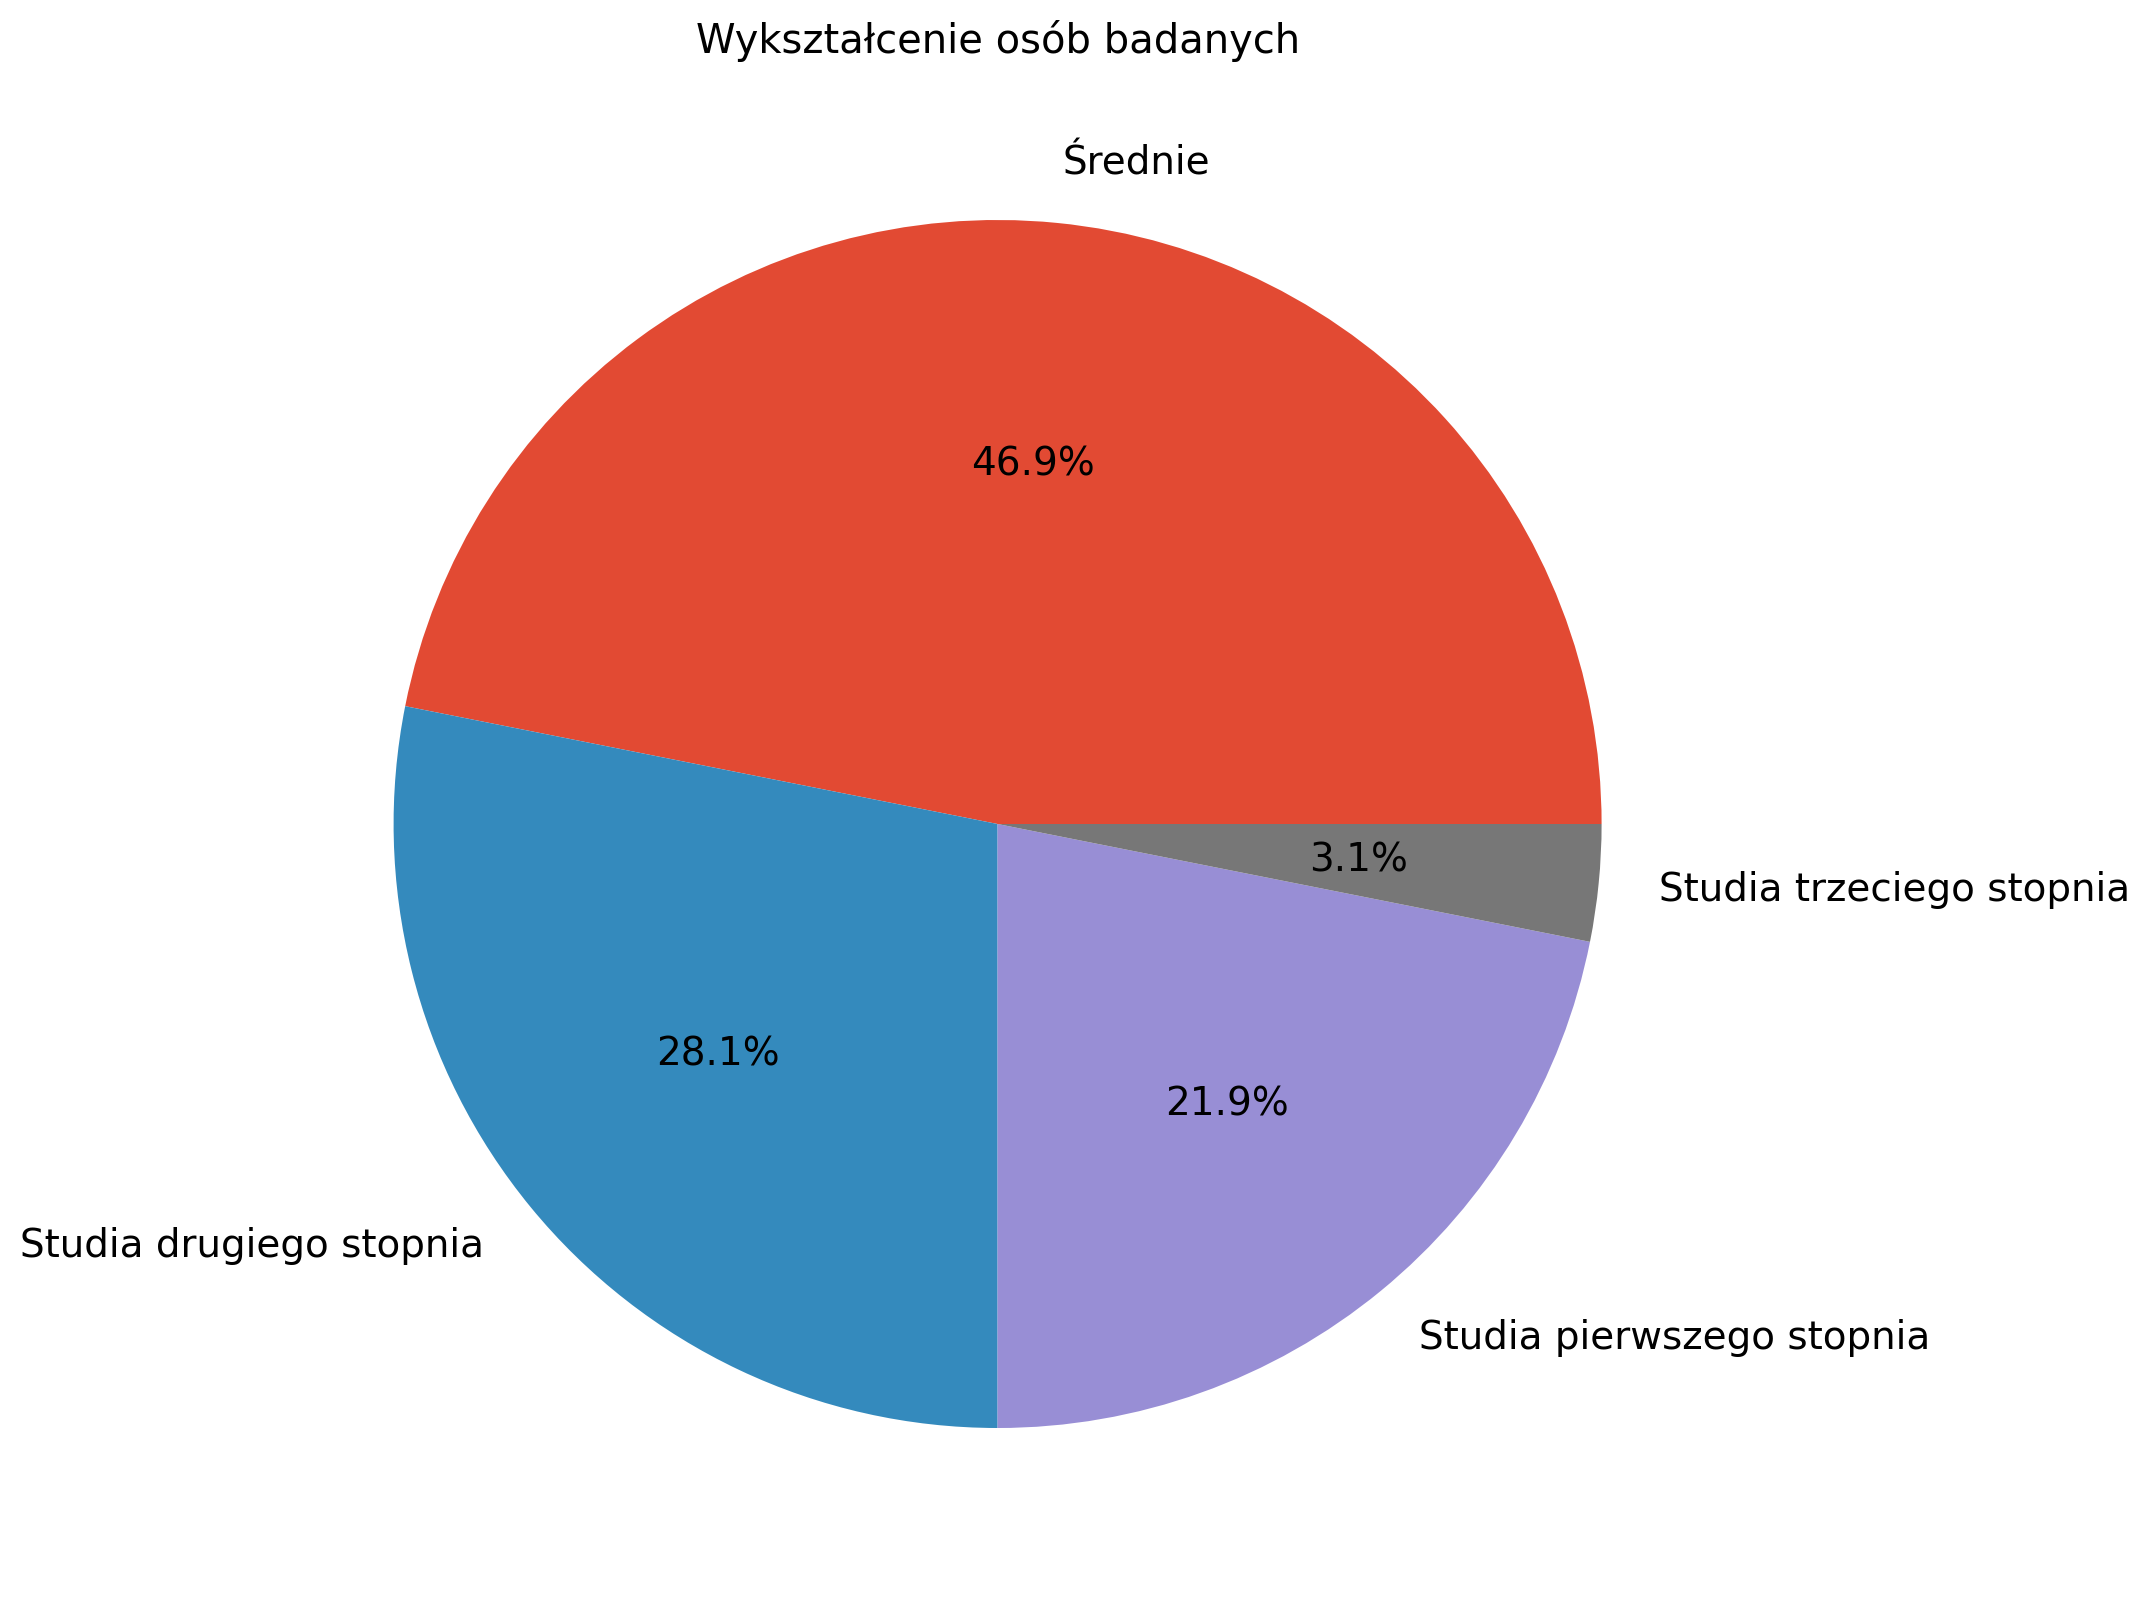

In [5]:
# zapisujemy kolumnę "wykształcenie" w nowej zmiennej i rekodujemy wartości
rozklad_wyksztalcenia = qrgs_data["wyksztalcenie"].replace({1: "Podstawowe lub gimnazjalne", 2: "Zasadnicze zawodowe lub branżowe", 3: "Średnie", 4: "Studia pierwszego stopnia", 5: "Studia drugiego stopnia", 6: "Studia trzeciego stopnia", 7: "Wolę nie podawać"})

# liczymy wystąpienia i rozkład procentowy
osoby_badane_wyksztalcenie_liczba = rozklad_wyksztalcenia.value_counts()
osoby_badane_wyksztalcenie_procent = round(rozklad_wyksztalcenia.value_counts(normalize=True) * 100, 1)

# tworzymy jedną ładną tabelkę
wyniki_wyksztalcenie = pd.concat([osoby_badane_wyksztalcenie_liczba, osoby_badane_wyksztalcenie_procent], axis=1)
wyniki_wyksztalcenie.columns = ["liczba", "procent"]


# rysujemy wykres
labele = list(osoby_badane_wyksztalcenie_liczba.index)
plt.pie(osoby_badane_wyksztalcenie_liczba[:], labels = labele, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title("Wykształcenie osób badanych")
plt.style.use('ggplot')


# pokazujemy wyniki naszej pracy
print("Wykształcenie osób badanych:")
print(wyniki_wyksztalcenie)

plt.show()


# Analiza pierwszego trybu anotacji

In [6]:
def wyniki_procentowe(dane, typ):
    # prosta funkcja, która zbiera dane i rekoduje je na typ odpowiedzi, 
    # oblicza liczbę i procent dobrych odpowiedzi
    
    answers = dane
    intended_answer = typ
    
    answers = answers.replace({1: "DA", 2: "EAP", 3: "EAI", 4: "IA"})
    
    rozklad_odpowiedzi = answers.value_counts()
    ile_dobrych = answers.value_counts()[intended_answer]
    ile_procent_dobrych = round(100 * ile_dobrych / liczba_badanych, 2)
    
    return rozklad_odpowiedzi, ile_dobrych, ile_procent_dobrych

## Proste analizy – liczba i procent poprawnych odpowiedzi

### Zadanie 1

Pytanie 1

In [7]:
rozklad1_1, liczba1_1, procent1_1 = wyniki_procentowe(qrgs_data["s1_pytanie1"], "DA")
print(rozklad1_1)
print(f"Liczba poprawnych odpowiedzi: {liczba1_1}")
print(f"Procent poprawnych odpowiedzi: {procent1_1}")

DA     23
IA      5
EAP     3
EAI     1
Name: s1_pytanie1, dtype: int64
Liczba poprawnych odpowiedzi: 23
Procent poprawnych odpowiedzi: 71.88


Pytanie 2

In [8]:
rozklad1_2, liczba1_2, procent1_2 = wyniki_procentowe(qrgs_data["s1_pytanie2"], "EAI")

print(rozklad1_2)
print(f"Liczba poprawnych odpowiedzi: {liczba1_2}")
print(f"Procent poprawnych odpowiedzi: {procent1_2}")

EAI    23
IA      5
EAP     2
DA      2
Name: s1_pytanie2, dtype: int64
Liczba poprawnych odpowiedzi: 23
Procent poprawnych odpowiedzi: 71.88


Pytanie 3

In [9]:
rozklad1_3, liczba1_3, procent1_3 = wyniki_procentowe(qrgs_data["s1_pytanie3"], "EAP")

print(rozklad1_3)
print(f"Liczba poprawnych odpowiedzi: {liczba1_3}")
print(f"Procent poprawnych odpowiedzi: {procent1_3}")

EAP    20
IA      8
EAI     4
Name: s1_pytanie3, dtype: int64
Liczba poprawnych odpowiedzi: 20
Procent poprawnych odpowiedzi: 62.5


Pytanie 4

In [10]:
rozklad1_4, liczba1_4, procent1_4 = wyniki_procentowe(qrgs_data["s1_pytanie4"], "IA")

print(rozklad1_4)
print(f"Liczba poprawnych odpowiedzi: {liczba1_4}")
print(f"Procent poprawnych odpowiedzi: {procent1_4}")

IA     13
EAP     9
EAI     5
DA      5
Name: s1_pytanie4, dtype: int64
Liczba poprawnych odpowiedzi: 13
Procent poprawnych odpowiedzi: 40.62


#### Podsumowanie zadania 1 w tabeli

In [11]:
wyniki_zadanie1 = pd.DataFrame({"Pytanie 1 (DA)" : [liczba1_1, procent1_1], "Pytanie 2 (EAI)" : [liczba1_2, procent1_2], "Pytanie 3 (EAP)": [liczba1_3, procent1_3], "Pytanie 4 (IA)" :  [liczba1_4, procent1_4]}, ["liczba poprawnych",  "% poprawnych"])
wyniki_zadanie1


,Pytanie 1 (DA),Pytanie 2 (EAI),Pytanie 3 (EAP),Pytanie 4 (IA)
liczba poprawnych,23.00,23.00,20.0,13.00
% poprawnych,71.88,71.88,62.5,40.62


### Zadanie 2

Pytanie 1

In [12]:
rozklad2_1, liczba2_1, procent2_1 = wyniki_procentowe(qrgs_data["s2_pytanie1"], "EAI")

print(rozklad2_1)
print(f"Liczba poprawnych odpowiedzi: {liczba2_1}")
print(f"Procent poprawnych odpowiedzi: {procent2_1}")

EAI    26
IA      4
EAP     2
Name: s2_pytanie1, dtype: int64
Liczba poprawnych odpowiedzi: 26
Procent poprawnych odpowiedzi: 81.25


Pytanie 2

In [13]:
rozklad2_2, liczba2_2, procent2_2 = wyniki_procentowe(qrgs_data["s2_pytanie2"], "EAP")

print(rozklad2_2)
print(f"Liczba poprawnych odpowiedzi: {liczba2_2}")
print(f"Procent poprawnych odpowiedzi: {procent2_2}")

EAP    24
EAI     4
IA      3
DA      1
Name: s2_pytanie2, dtype: int64
Liczba poprawnych odpowiedzi: 24
Procent poprawnych odpowiedzi: 75.0


Pytanie 3

In [14]:
rozklad2_3, liczba2_3, procent2_3 = wyniki_procentowe(qrgs_data["s2_pytanie3"], "IA")

print(rozklad2_3)
print(f"Liczba poprawnych odpowiedzi: {liczba2_3}")
print(f"Procent poprawnych odpowiedzi: {procent2_3}")

IA     25
EAP     5
EAI     1
DA      1
Name: s2_pytanie3, dtype: int64
Liczba poprawnych odpowiedzi: 25
Procent poprawnych odpowiedzi: 78.12


Pytanie 4

In [15]:
rozklad2_4, liczba2_4, procent2_4 = wyniki_procentowe(qrgs_data["s2_pytanie4"], "DA")

print(rozklad2_4)
print(f"Liczba poprawnych odpowiedzi: {liczba2_4}")
print(f"Procent poprawnych odpowiedzi: {procent2_4}")

DA     29
EAP     1
IA      1
EAI     1
Name: s2_pytanie4, dtype: int64
Liczba poprawnych odpowiedzi: 29
Procent poprawnych odpowiedzi: 90.62


#### Podsumowanie zadania 3 w tabeli

In [16]:
wyniki_zadanie3 = pd.DataFrame({"Pytanie 1 (EAI)" : [liczba2_1, procent2_1], "Pytanie 2 (EAP)" : [liczba2_2, procent2_2], "Pytanie 3 (IA)": [liczba2_3, procent2_3], "Pytanie 4 (DA)" :  [liczba2_4, procent2_4]}, ["liczba poprawnych",  "% poprawnych"])
wyniki_zadanie3


,Pytanie 1 (EAI),Pytanie 2 (EAP),Pytanie 3 (IA),Pytanie 4 (DA)
liczba poprawnych,26.00,24.0,25.00,29.00
% poprawnych,81.25,75.0,78.12,90.62


### Zadanie 4

Pytanie 1

In [17]:
rozklad4_1, liczba4_1, procent4_1 = wyniki_procentowe(qrgs_data["s4_pytanie1"], "DA")

print(rozklad4_1)
print(f"Liczba poprawnych odpowiedzi: {liczba4_1}")
print(f"Procent poprawnych odpowiedzi: {procent4_1}")

DA     26
EAP     5
IA      1
Name: s4_pytanie1, dtype: int64
Liczba poprawnych odpowiedzi: 26
Procent poprawnych odpowiedzi: 81.25


Pytanie 2

In [18]:
rozklad4_2, liczba4_2, procent4_2 = wyniki_procentowe(qrgs_data["s4_pytanie2"], "IA")

print(rozklad4_2)
print(f"Liczba poprawnych odpowiedzi: {liczba4_2}")
print(f"Procent poprawnych odpowiedzi: {procent4_2}")

IA     30
EAP     2
Name: s4_pytanie2, dtype: int64
Liczba poprawnych odpowiedzi: 30
Procent poprawnych odpowiedzi: 93.75


Pytanie 3

In [19]:
rozklad4_3, liczba4_3, procent4_3 = wyniki_procentowe(qrgs_data["s4_pytanie3"], "EAI")

print(rozklad4_3)
print(f"Liczba poprawnych odpowiedzi: {liczba4_3}")
print(f"Procent poprawnych odpowiedzi: {procent4_3}")

EAI    26
EAP     2
IA      2
DA      2
Name: s4_pytanie3, dtype: int64
Liczba poprawnych odpowiedzi: 26
Procent poprawnych odpowiedzi: 81.25


Pytanie 4

In [20]:
rozklad4_4, liczba4_4, procent4_4 = wyniki_procentowe(qrgs_data["s4_pytanie4"], "EAP")

print(rozklad4_4)
print(f"Liczba poprawnych odpowiedzi: {liczba4_4}")
print(f"Procent poprawnych odpowiedzi: {procent4_4}")

EAP    23
EAI     6
DA      3
Name: s4_pytanie4, dtype: int64
Liczba poprawnych odpowiedzi: 23
Procent poprawnych odpowiedzi: 71.88


#### Podsumowanie zadania 4 w tabeli

In [21]:
wyniki_zadanie4 = pd.DataFrame({"Pytanie 1 (DA)" : [liczba4_1, procent4_1], "Pytanie 2 (IA)" : [liczba4_2, procent4_2], "Pytanie 3 (EAI)": [liczba4_3, procent4_3], "Pytanie 4 (EAP)" :  [liczba4_4, procent4_4]}, ["liczba poprawnych",  "% poprawnych"])
wyniki_zadanie4


,Pytanie 1 (DA),Pytanie 2 (IA),Pytanie 3 (EAI),Pytanie 4 (EAP)
liczba poprawnych,26.00,30.00,26.00,23.00
% poprawnych,81.25,93.75,81.25,71.88


### Zadanie 3

Pytanie 1

In [22]:
rozklad3_1, liczba3_1, procent3_1 = wyniki_procentowe(qrgs_data["s3_pytanie1"], "EAP")

print(rozklad3_1)
print(f"Liczba poprawnych odpowiedzi: {liczba3_1}")
print(f"Procent poprawnych odpowiedzi: {procent3_1}")

EAP    26
EAI     4
IA      2
Name: s3_pytanie1, dtype: int64
Liczba poprawnych odpowiedzi: 26
Procent poprawnych odpowiedzi: 81.25


Pytanie 2

In [23]:
rozklad3_2, liczba3_2, procent3_2 = wyniki_procentowe(qrgs_data["s3_pytanie2"], "EAI")

print(rozklad3_2)
print(f"Liczba poprawnych odpowiedzi: {liczba3_2}")
print(f"Procent poprawnych odpowiedzi: {procent3_2}")

EAI    25
DA      5
EAP     2
Name: s3_pytanie2, dtype: int64
Liczba poprawnych odpowiedzi: 25
Procent poprawnych odpowiedzi: 78.12


Pytanie 3

In [24]:
rozklad3_3, liczba3_3, procent3_3 = wyniki_procentowe(qrgs_data["s3_pytanie3"], "DA")

print(rozklad3_3)
print(f"Liczba poprawnych odpowiedzi: {liczba3_3}")
print(f"Procent poprawnych odpowiedzi: {procent3_3}")

DA     26
EAI     5
IA      1
Name: s3_pytanie3, dtype: int64
Liczba poprawnych odpowiedzi: 26
Procent poprawnych odpowiedzi: 81.25


Pytanie 4

In [25]:
rozklad3_4, liczba3_4, procent3_4 = wyniki_procentowe(qrgs_data["s3_pytanie4"], "IA")

print(rozklad3_4)
print(f"Liczba poprawnych odpowiedzi: {liczba3_4}")
print(f"Procent poprawnych odpowiedzi: {procent3_4}")

IA     29
EAP     2
EAI     1
Name: s3_pytanie4, dtype: int64
Liczba poprawnych odpowiedzi: 29
Procent poprawnych odpowiedzi: 90.62


#### Podsumowanie zadania 3 w tabeli

In [26]:
wyniki_zadanie2 = pd.DataFrame({"Pytanie 1 (EAP)" : [liczba3_1, procent3_1], "Pytanie 2 (EAI)" : [liczba3_2, procent3_2], "Pytanie 3 (DA)": [liczba3_3, procent3_3], "Pytanie 4 (IA)" :  [liczba3_4, procent3_4]}, ["liczba poprawnych",  "% poprawnych"])
wyniki_zadanie2


,Pytanie 1 (EAP),Pytanie 2 (EAI),Pytanie 3 (DA),Pytanie 4 (IA)
liczba poprawnych,26.00,25.00,26.00,29.00
% poprawnych,81.25,78.12,81.25,90.62


### Wykres dla rozkładu odpowiedzi na konkretne pytania

#### Funkcje do zbierania odpowiedzi

In [27]:
def zbierz_odpowiedzi(dane1, dane2, dane3, dane4):
    gotowe = []
    lista_danych = [dane1, dane2, dane3, dane4]
    
    for element in lista_danych:
        
        pytanie = element

        jedynki = 0
        dwójki = 0
        trójki = 0
        czwórki = 0

        for element in pytanie:
            if element == 1:
                jedynki += 1
            elif element == 2:
                dwójki += 1
            elif element == 3:
                trójki += 1
            else:
                czwórki += 1

        lista = [jedynki, dwójki, trójki, czwórki]
        
        gotowe.append(lista)

    return gotowe
        

In [28]:
def zbieranie_2tryb (dane):
    lista = []
    jedynki = 0
    dwójki = 0
    trójki = 0
    czwórki = 0
    for element in dane:
        if element == 1:
            jedynki += 1
        elif element == 2:
            dwójki += 1
        elif element == 3:
            trójki += 1
        else:
            czwórki += 1
    lista = [jedynki, dwójki, trójki, czwórki]
    
    return lista       

In [29]:
def get_data_for_plot(label_na_wykres, dane):
    wartości = zbieranie_2tryb(dane)
    do_zwrotu = {label_na_wykres : wartości}
    
    return do_zwrotu


In [54]:
do_zapisania1 = get_data_for_plot("Pytanie 1", qrgs_data["s1_pytanie1"])
do_zapisania2 = get_data_for_plot("Pytanie 2", qrgs_data["s1_pytanie2"])
do_zapisania3 = get_data_for_plot("Pytanie 3", qrgs_data["s1_pytanie3"])
do_zapisania4 = get_data_for_plot("Pytanie 4", qrgs_data["s1_pytanie4"])

do_grafu1 = do_zapisania1 | do_zapisania2 | do_zapisania3 | do_zapisania4

do_zapisania1 = get_data_for_plot("Pytanie 1", qrgs_data["s2_pytanie1"])
do_zapisania2 = get_data_for_plot("Pytanie 2", qrgs_data["s2_pytanie2"])
do_zapisania3 = get_data_for_plot("Pytanie 3", qrgs_data["s2_pytanie3"])
do_zapisania4 = get_data_for_plot("Pytanie 4", qrgs_data["s2_pytanie4"])

do_grafu2 = do_zapisania1 | do_zapisania2 | do_zapisania3 | do_zapisania4

do_zapisania1 = get_data_for_plot("Pytanie 1", qrgs_data["s3_pytanie1"])
do_zapisania2 = get_data_for_plot("Pytanie 2", qrgs_data["s3_pytanie2"])
do_zapisania3 = get_data_for_plot("Pytanie 3", qrgs_data["s3_pytanie3"])
do_zapisania4 = get_data_for_plot("Pytanie 4", qrgs_data["s3_pytanie4"])

do_grafu3 = do_zapisania1 | do_zapisania2 | do_zapisania3 | do_zapisania4

do_zapisania1 = get_data_for_plot("Pytanie 1", qrgs_data["s4_pytanie1"])
do_zapisania2 = get_data_for_plot("Pytanie 2", qrgs_data["s4_pytanie2"])
do_zapisania3 = get_data_for_plot("Pytanie 3", qrgs_data["s4_pytanie3"])
do_zapisania4 = get_data_for_plot("Pytanie 4", qrgs_data["s4_pytanie4"])

do_grafu4 = do_zapisania1 | do_zapisania2 | do_zapisania3 | do_zapisania4

do_zapisania1 = get_data_for_plot("Zadanie 5", qrgs_data["s5_pytanie"])
do_zapisania2 = get_data_for_plot("Zadanie 6", qrgs_data["s6_pytanie"])
do_zapisania3 = get_data_for_plot("Zadanie 7", qrgs_data["s7_pytanie"])
do_zapisania4 = get_data_for_plot("Zadanie 8", qrgs_data["s8_pytanie"])

do_grafu5 = do_zapisania1 | do_zapisania2 | do_zapisania3 | do_zapisania4

category_names = ["DA", "IA", "EAP", "EAI"] 


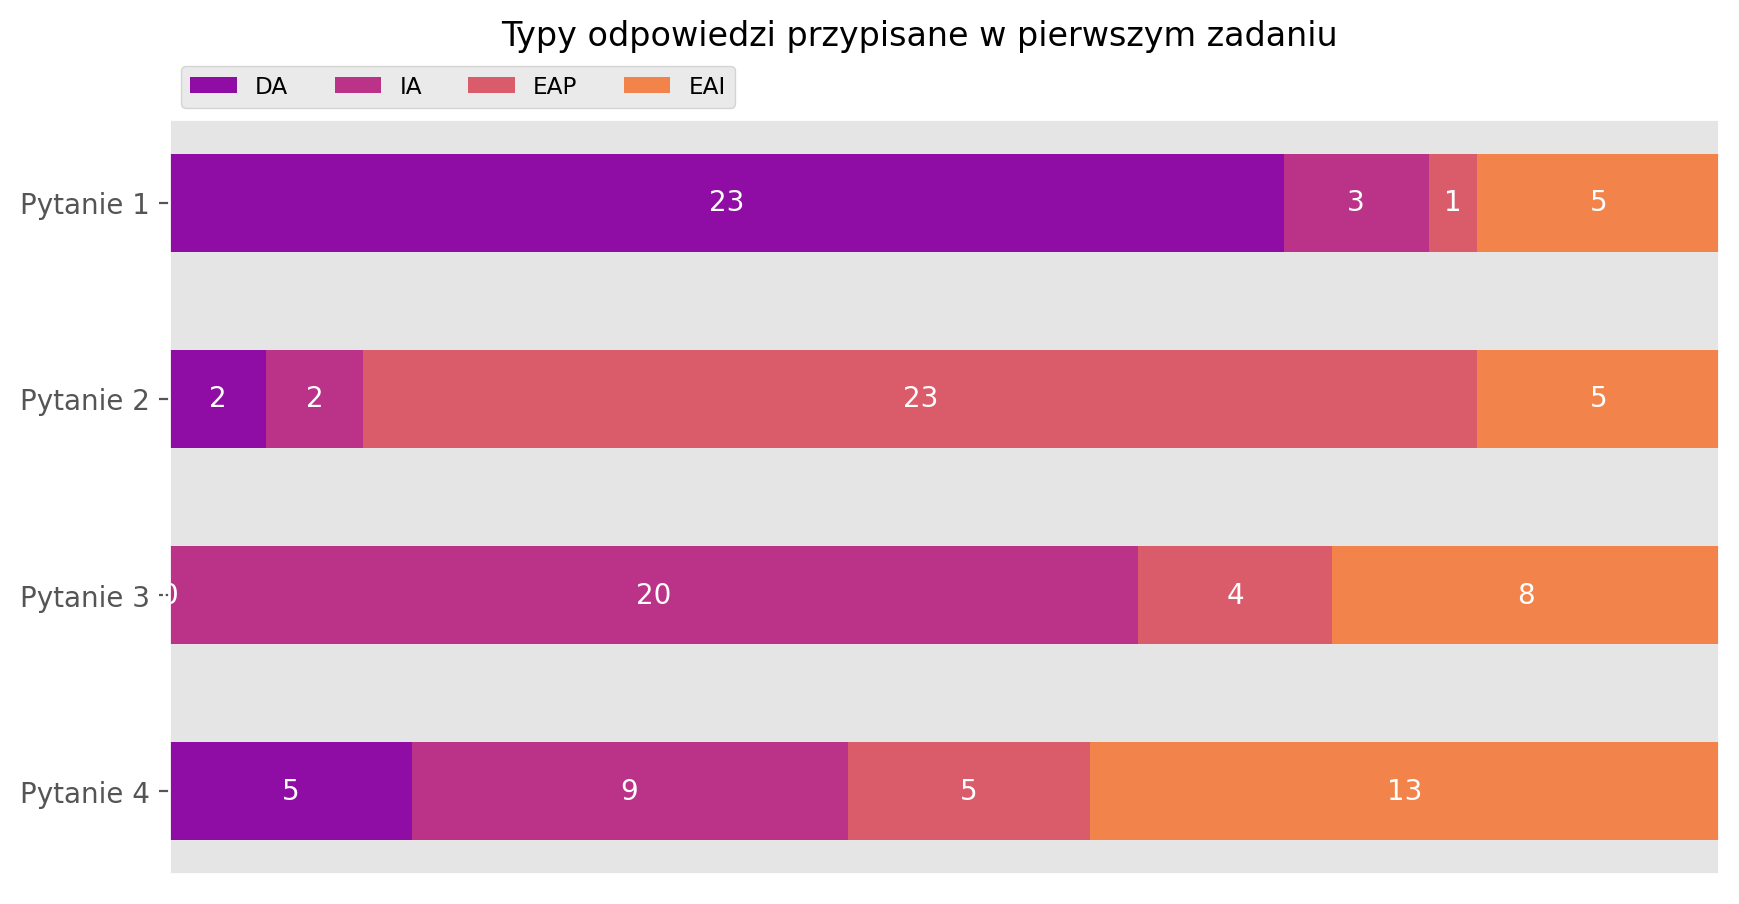

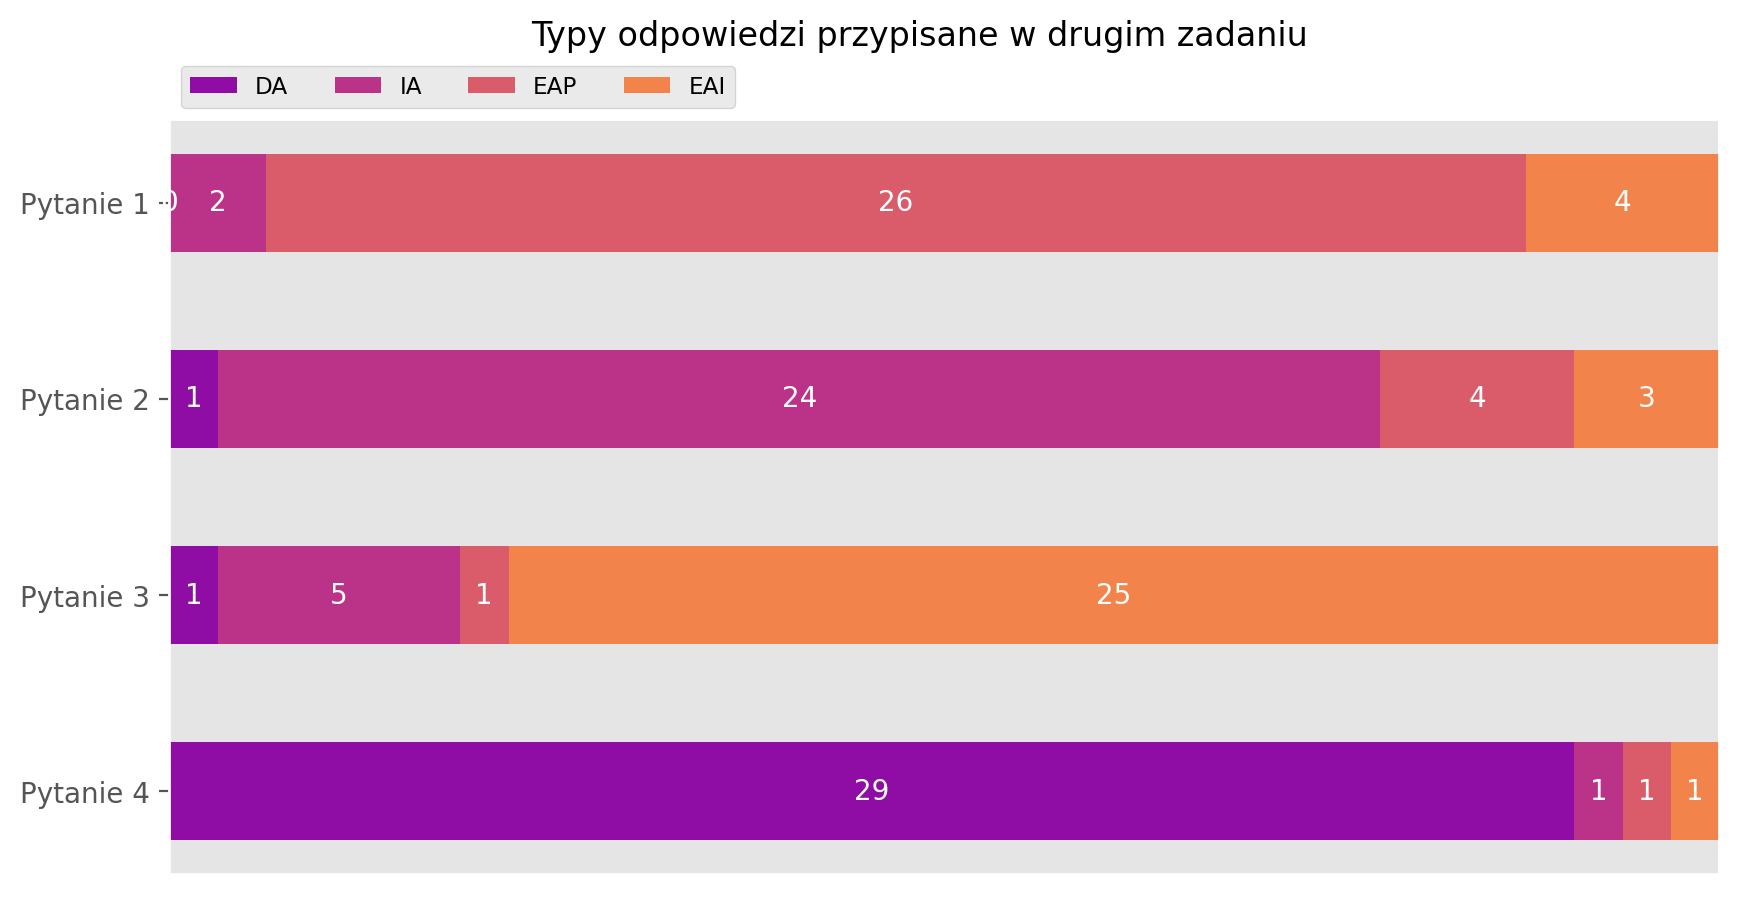

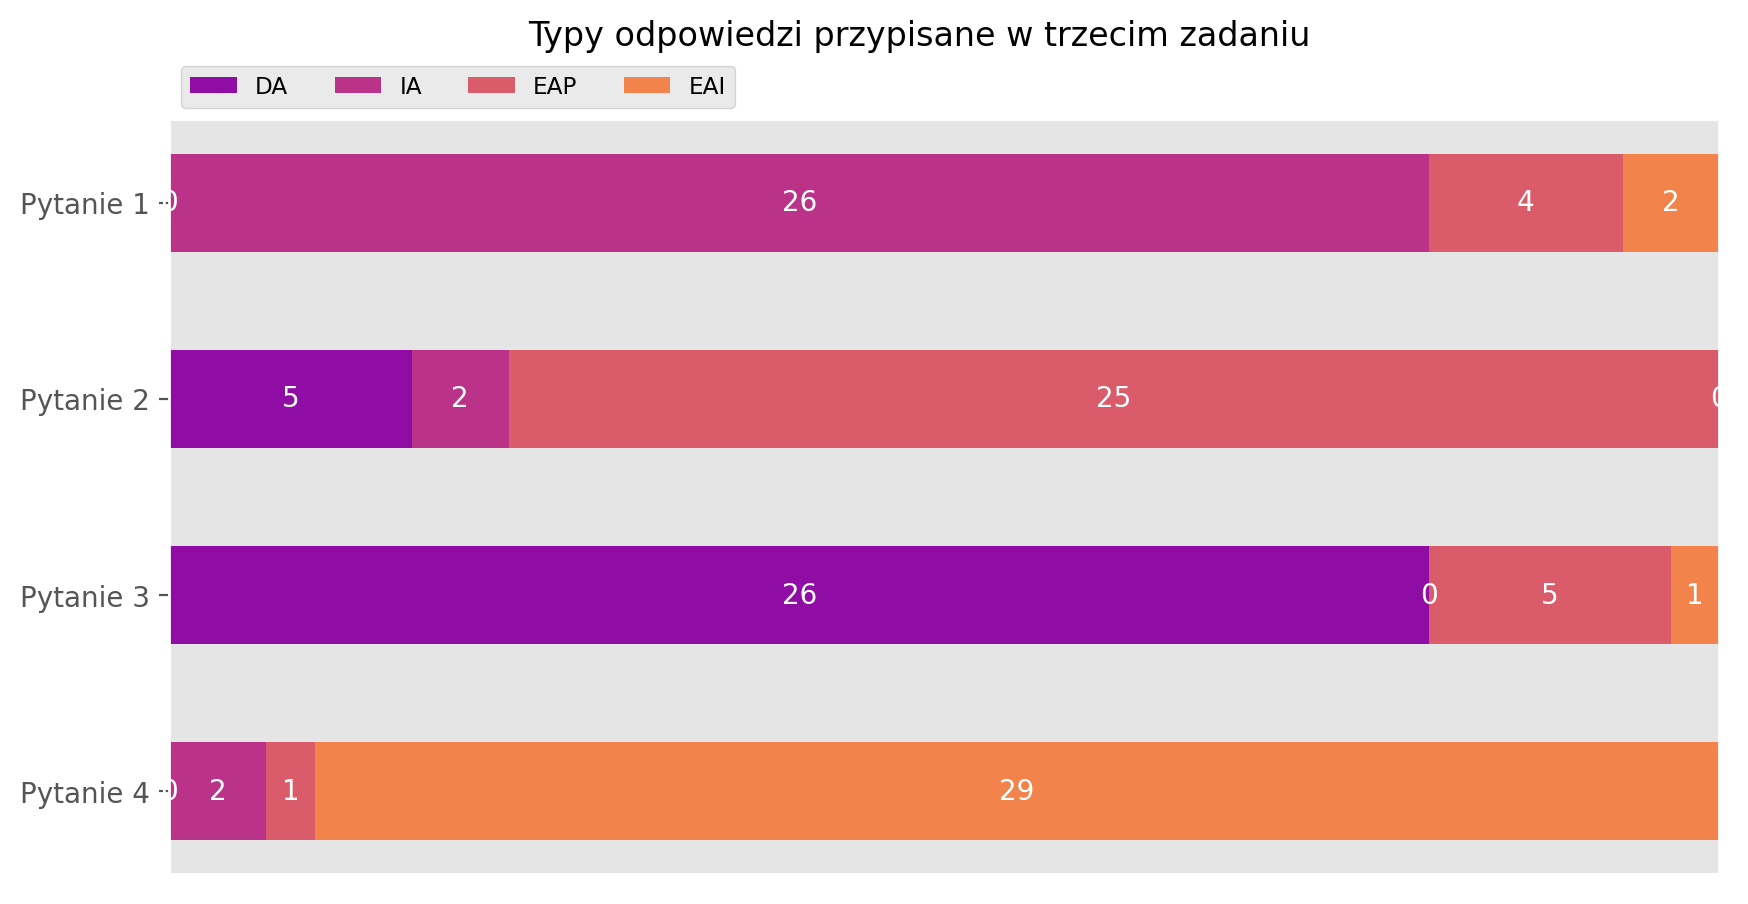

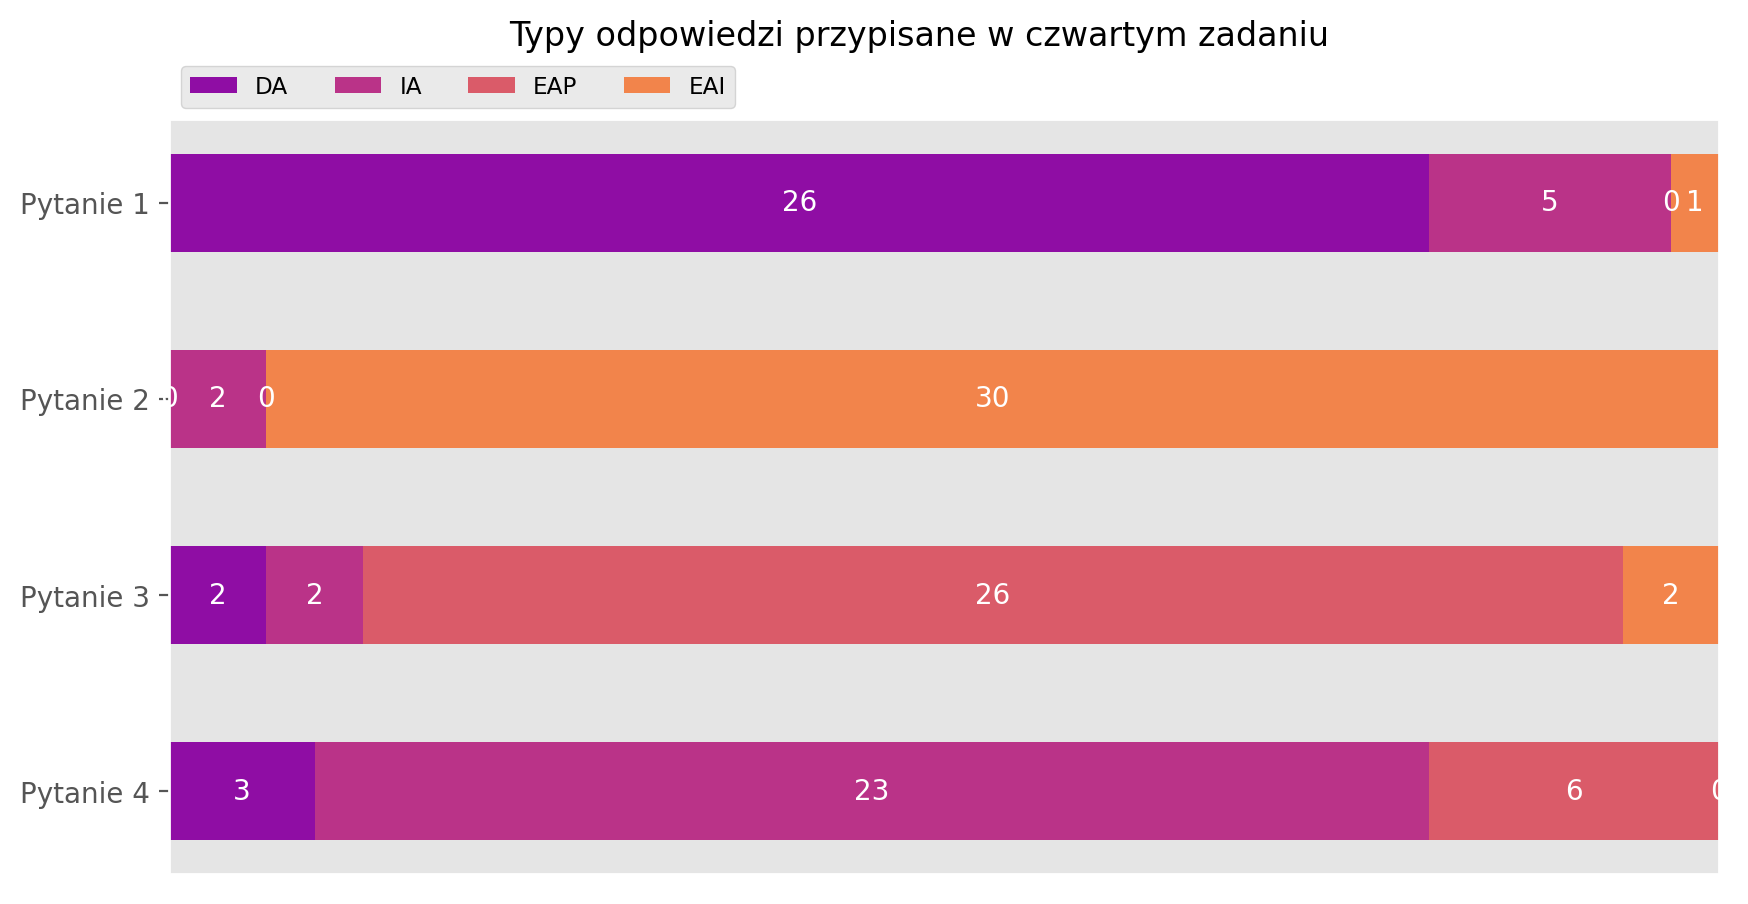

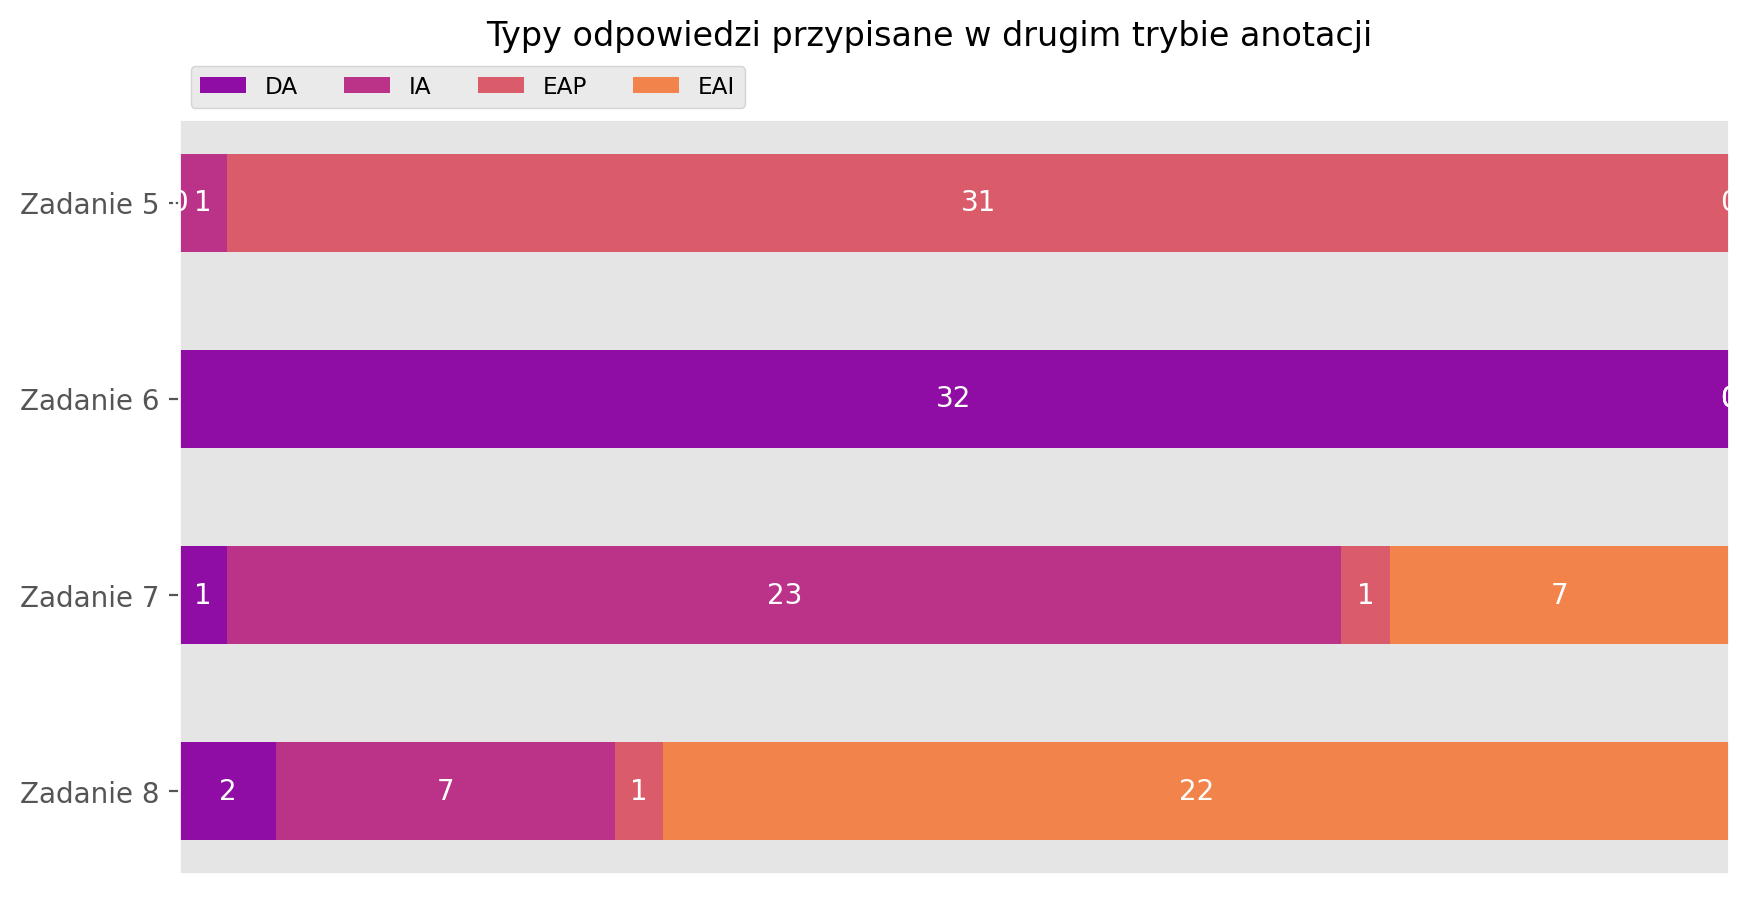

In [56]:
category_names = ["DA", "IA", "EAP", "EAI"] 


def graf_rozkladu(results, category_names, title):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('plasma')(
        np.linspace(0.3, 0.7, data.shape[1]))
    

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    
    fig.suptitle(title)
    
    return fig, ax


graf_rozkladu(do_grafu1, category_names, "Typy odpowiedzi przypisane w pierwszym zadaniu")
graf_rozkladu(do_grafu2, category_names, "Typy odpowiedzi przypisane w drugim zadaniu")
graf_rozkladu(do_grafu3, category_names, "Typy odpowiedzi przypisane w trzecim zadaniu")
graf_rozkladu(do_grafu4, category_names, "Typy odpowiedzi przypisane w czwartym zadaniu")
graf_rozkladu(do_grafu5, category_names, "Typy odpowiedzi przypisane w drugim trybie anotacji")

plt.show()


## Obliczenie Kappy Fleissa dla poszczególnych pytań

### Pierwszy tryb anotacji

Zgodność w zadaniu 1

In [32]:
cale_zadanie1 = zbierz_odpowiedzi(qrgs_data["s1_pytanie1"], qrgs_data["s1_pytanie2"], qrgs_data["s1_pytanie3"], qrgs_data["s1_pytanie4"])
kappa1 = inter_rater.fleiss_kappa(cale_zadanie1, method='fleiss')
print(cale_zadanie1)
print(f"Kappa wynosi: {kappa1}")

[[23, 3, 1, 5], [2, 2, 23, 5], [0, 20, 4, 8], [5, 9, 5, 13]]
Kappa wynosi: 0.2635135490176503


Zgodność w zadaniu 2

In [33]:
cale_zadanie2 = zbierz_odpowiedzi(qrgs_data["s2_pytanie1"], qrgs_data["s2_pytanie2"], qrgs_data["s2_pytanie3"], qrgs_data["s2_pytanie4"])
kappa2 = inter_rater.fleiss_kappa(cale_zadanie2, method='fleiss')
print(cale_zadanie2)
print(f"Kappa wynosi: {kappa2}")

[[0, 2, 26, 4], [1, 24, 4, 3], [1, 5, 1, 25], [29, 1, 1, 1]]
Kappa wynosi: 0.5624287807260296


Zgodność w zadaniu 3

In [34]:
cale_zadanie3 = zbierz_odpowiedzi(qrgs_data["s3_pytanie1"], qrgs_data["s3_pytanie2"], qrgs_data["s3_pytanie3"], qrgs_data["s3_pytanie4"])
kappa3 = inter_rater.fleiss_kappa(cale_zadanie3, method='fleiss')
print(cale_zadanie3)
print(f"Kappa wynosi: {kappa3}")

[[0, 26, 4, 2], [5, 2, 25, 0], [26, 0, 5, 1], [0, 2, 1, 29]]
Kappa wynosi: 0.5969870746976298


Zgodność w zadaniu 4

In [35]:
cale_zadanie4 = zbierz_odpowiedzi(qrgs_data["s4_pytanie1"], qrgs_data["s4_pytanie2"], qrgs_data["s4_pytanie3"], qrgs_data["s4_pytanie4"])
kappa4 = inter_rater.fleiss_kappa(cale_zadanie4, method='fleiss')
print(cale_zadanie4)
print(f"Kappa wynosi: {kappa4}")

[[26, 5, 0, 1], [0, 2, 0, 30], [2, 2, 26, 2], [3, 23, 6, 0]]
Kappa wynosi: 0.5872984199167162


#### Ogólna zgodność sędziów w pierwszym trybie anotacji

In [36]:
ogolna_zgodnosc = cale_zadanie1 + cale_zadanie2 + cale_zadanie3 + cale_zadanie4
ogolna_kappa_1tryb = inter_rater.fleiss_kappa(ogolna_zgodnosc, method='fleiss')

print(f"Kappa z całego pierwszego trybu: {ogolna_kappa_1tryb}")

Kappa z całego pierwszego trybu: 0.5027499587268235


### Drugi tryb anotacji

In [37]:
odp_drugitryb = zbierz_odpowiedzi(qrgs_data["s5_pytanie"], qrgs_data["s6_pytanie"], qrgs_data["s7_pytanie"], qrgs_data["s7_pytanie"])
ogolna_kappa_2tryb = inter_rater.fleiss_kappa(odp_drugitryb, method='fleiss')

print(f"Kappa z całego drugiego trybu: {ogolna_kappa_2tryb}")

Kappa z całego drugiego trybu: 0.6657081434156049


### Zbiorcze podsumowanie zgodności

In [38]:
pierwszy_tryb_podsumowanie = pd.DataFrame({"Zadanie 1": [kappa1], "Zadanie 2": [kappa2], "Zadanie 3": [kappa3], "Zadanie 4": [kappa4], "I tryb": [ogolna_kappa_1tryb], "II tryb": [ogolna_kappa_2tryb]}, ["wartość kappa"])
pierwszy_tryb_podsumowanie

,Zadanie 1,Zadanie 2,Zadanie 3,Zadanie 4,I tryb,II tryb
wartość kappa,0.263514,0.562429,0.596987,0.587298,0.50275,0.665708


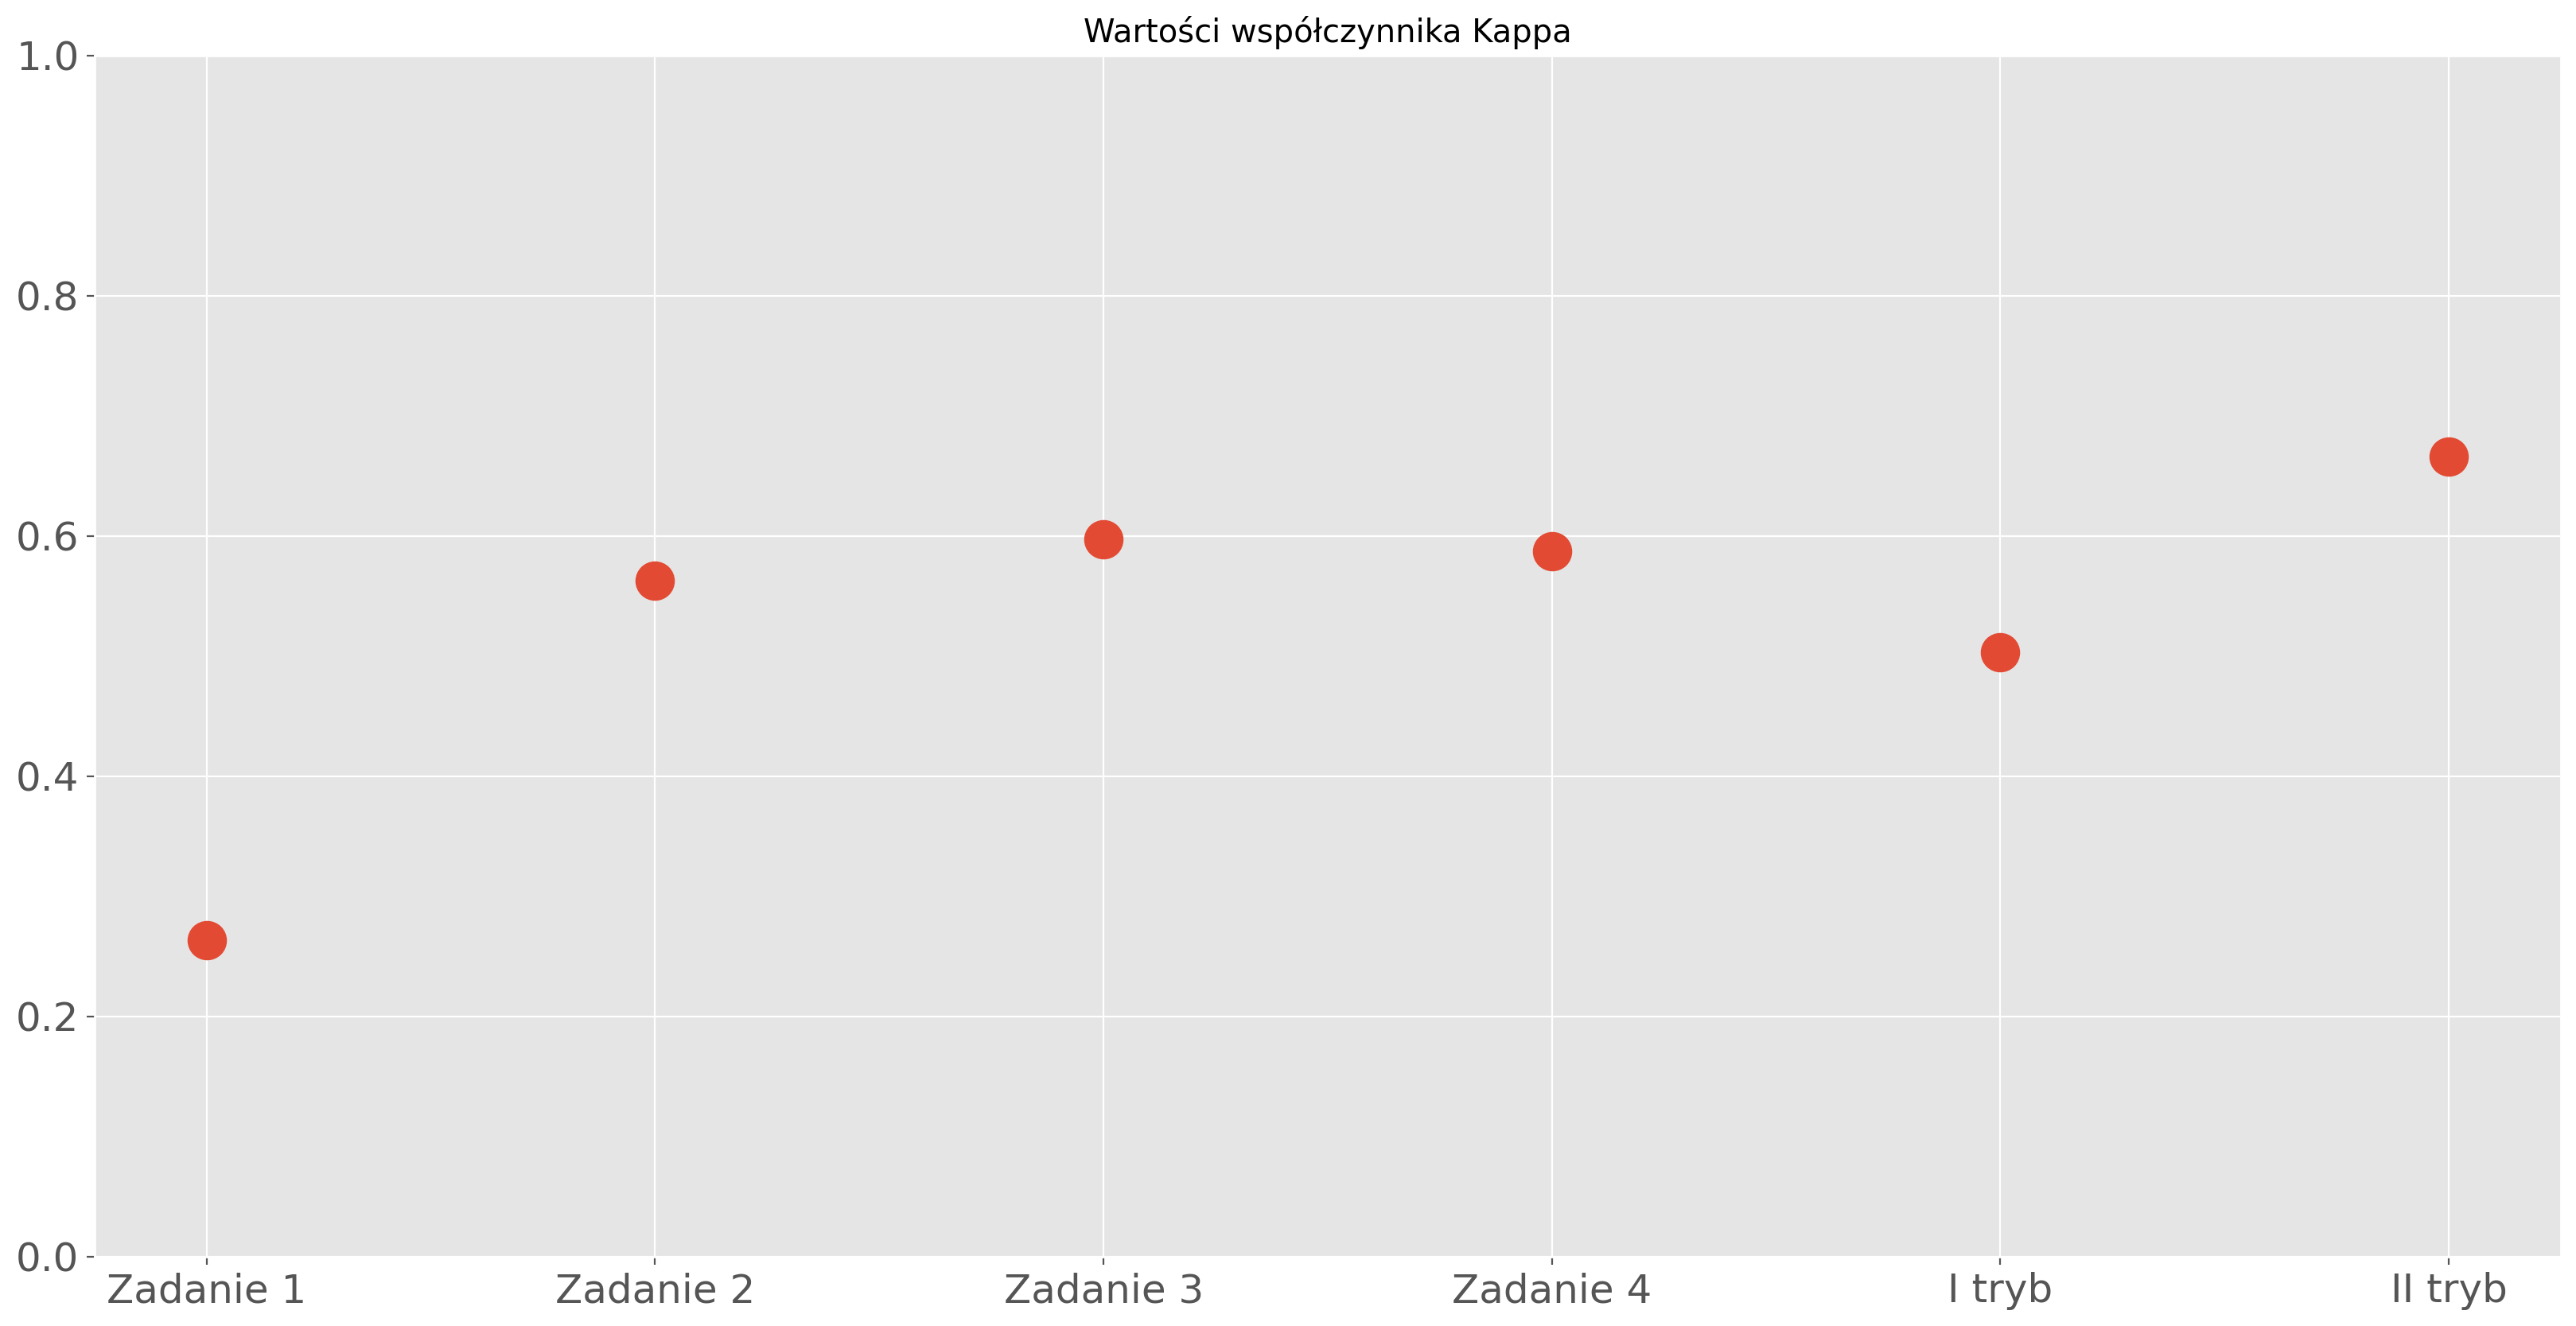

In [39]:
na_kappa_wykres = {"Zadanie 1": kappa1, 
                   "Zadanie 2": kappa2, 
                   "Zadanie 3": kappa3, 
                   "Zadanie 4": kappa4, 
                   "I tryb": ogolna_kappa_1tryb, 
                   "II tryb": ogolna_kappa_2tryb}

x = na_kappa_wykres.keys()
y = na_kappa_wykres.values()

plt.scatter(x, y, marker="o", s=300)
plt.ylim(0, 1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


plt.title("Wartości współczynnika Kappa")
plt.style.use('ggplot')
plt.show()

## Pewność

Zadanie 1

In [40]:
pd.DataFrame({"Pytanie 1 (DA)": [round(np.mean(qrgs_data["s1_pewnosc1"]), 2), np.median(qrgs_data["s1_pewnosc1"])], 
              "Pytanie 2 (EAI)": [round(np.mean(qrgs_data["s1_pewnosc2"]), 2), np.median(qrgs_data["s1_pewnosc2"])],
              "Pytanie 3 (EAP)": [round(np.mean(qrgs_data["s1_pewnosc3"]), 2), np.median(qrgs_data["s1_pewnosc3"])],
              "Pytanie 4 (IA)": [round(np.mean(qrgs_data["s1_pewnosc4"]), 2), np.median(qrgs_data["s1_pewnosc4"])]}, 
             ["średnia", "mediana"])

,Pytanie 1 (DA),Pytanie 2 (EAI),Pytanie 3 (EAP),Pytanie 4 (IA)
średnia,2.47,2.5,2.34,2.09
mediana,3.00,3.0,3.00,2.00


Zadanie 2

In [41]:
pd.DataFrame({"Pytanie 1 (EAI)": [round(np.mean(qrgs_data["s2_pewnosc1"]), 2), np.median(qrgs_data["s2_pewnosc1"])], 
              "Pytanie 2 (EAP)": [round(np.mean(qrgs_data["s2_pewnosc2"]), 2), np.median(qrgs_data["s2_pewnosc2"])],
              "Pytanie 3 (IA)": [round(np.mean(qrgs_data["s2_pewnosc3"]), 2), np.median(qrgs_data["s2_pewnosc3"])],
              "Pytanie 4 (DA)": [round(np.mean(qrgs_data["s2_pewnosc4"]), 2), np.median(qrgs_data["s2_pewnosc4"])]}, 
             ["średnia", "mediana"])

,Pytanie 1 (EAI),Pytanie 2 (EAP),Pytanie 3 (IA),Pytanie 4 (DA)
średnia,2.53,2.16,2.03,2.44
mediana,3.00,2.00,2.00,3.00


Zadanie 3

In [42]:
pd.DataFrame({"Pytanie 1 (EAP)": [round(np.mean(qrgs_data["s3_pewnosc1"]), 2), np.median(qrgs_data["s3_pewnosc1"])], 
              "Pytanie 2 (EAI)": [round(np.mean(qrgs_data["s3_pewnosc2"]), 2), np.median(qrgs_data["s3_pewnosc2"])],
              "Pytanie 3 (DA)": [round(np.mean(qrgs_data["s3_pewnosc3"]), 2), np.median(qrgs_data["s3_pewnosc3"])],
              "Pytanie 4 (IA)": [round(np.mean(qrgs_data["s3_pewnosc4"]), 2), np.median(qrgs_data["s3_pewnosc4"])]}, 
             ["średnia", "mediana"])

,Pytanie 1 (EAP),Pytanie 2 (EAI),Pytanie 3 (DA),Pytanie 4 (IA)
średnia,2.28,2.44,2.41,2.5
mediana,2.50,3.00,3.00,3.0


Zadanie 4

In [44]:
pd.DataFrame({"Pytanie 1 (DA)": [round(np.mean(qrgs_data["s4_pewnosc1"]), 2), np.median(qrgs_data["s4_pewnosc1"])], 
              "Pytanie 2 (IA)": [round(np.mean(qrgs_data["s4_pewnosc2"]), 2), np.median(qrgs_data["s4_pewnosc2"])],
              "Pytanie 3 (EAI)": [round(np.mean(qrgs_data["s4_pewnosc3"]), 2), np.median(qrgs_data["s4_pewnosc3"])],
              "Pytanie 4 (EAP)": [round(np.mean(qrgs_data["s4_pewnosc4"]), 2), np.median(qrgs_data["s4_pewnosc4"])]}, 
             ["średnia", "mediana"])

,Pytanie 1 (DA),Pytanie 2 (IA),Pytanie 3 (EAI),Pytanie 4 (EAP)
średnia,2.56,2.53,2.34,2.19
mediana,3.00,3.00,3.00,3.00


Drugi tryb annotacji

In [47]:
pd.DataFrame({"Zadanie 1 (EAI)": [round(np.mean(qrgs_data["s5_pewnosc"]), 2), np.median(qrgs_data["s5_pewnosc"])], 
              "Pytanie 2 (DA)": [round(np.mean(qrgs_data["s6_pewnosc"]), 2), np.median(qrgs_data["s6_pewnosc"])],
              "Pytanie 3 (EAP)": [round(np.mean(qrgs_data["s7_pewnosc"]), 2), np.median(qrgs_data["s7_pewnosc"])],
              "Pytanie 4 (IA)": [round(np.mean(qrgs_data["s8_pewnosc"]), 2), np.median(qrgs_data["s8_pewnosc"])]}, 
             ["średnia", "mediana"])

,Zadanie 1 (EAI),Pytanie 2 (DA),Pytanie 3 (EAP),Pytanie 4 (IA)
średnia,2.53,2.62,2.0,2.03
mediana,3.00,3.00,2.0,2.00
